# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Dataset Importation

In [144]:
dataset = pd.read_csv("Life Expectancy Data.csv")
dataset

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

# Exploring the Life Expectancy Dataset

In [145]:
dataset.head

<bound method NDFrame.head of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0 

In [73]:
dataset.tail

<bound method NDFrame.tail of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0 

In [74]:
dataset.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [76]:
dataset.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [77]:
dataset.shape

(2938, 22)

# Features in the Dataset

C:\Users\User\AppData\Local\Temp\ipykernel_5400\1064046330.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(dataset.corr()[['Life expectancy ']].sort_values(by='Life expectancy ', ascending=False)


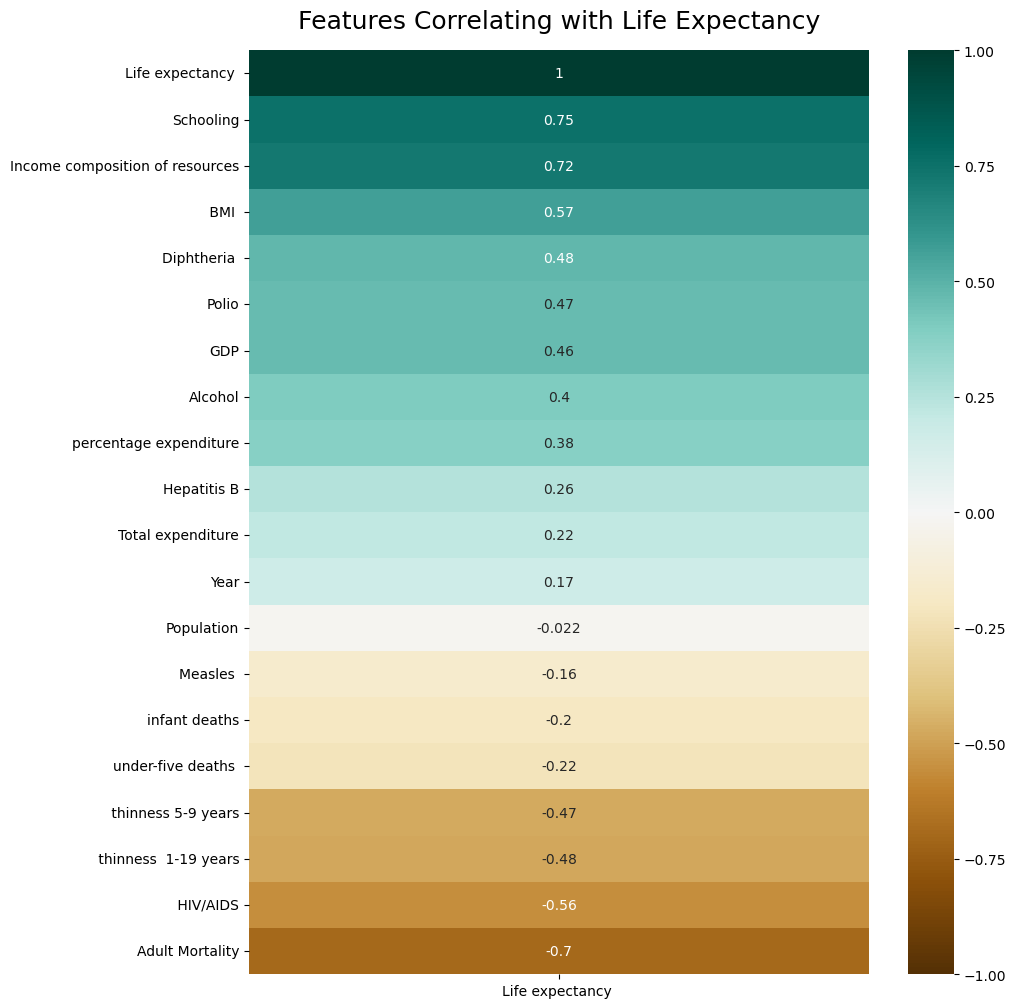

In [18]:
plt.figure(figsize=(10, 12))
heatmap = sns.heatmap(dataset.corr()[['Life expectancy ']].sort_values(by='Life expectancy ', ascending=False)
, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Life Expectancy', fontdict={'fontsize':18}, pad=16);

# EDA

In [78]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns
import os
import glob

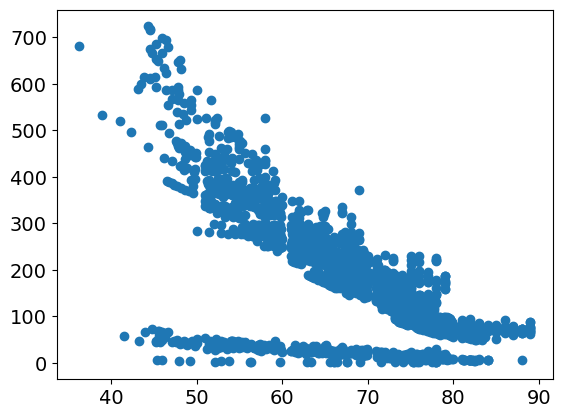

In [79]:
plt.scatter(dataset['Life expectancy '], dataset['Adult Mortality'])

In [97]:
sns.scatterplot(x= dataset["Alcohol"], y= dataset["Life expectancy "] , hue= dataset["Status"])
plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold")
plt.xlabel("Alcohol, recorded per capita", fontsize=13, fontweight="bold")
plt.show()

In [84]:
#Defining the life expectancy based on countries

fig=px.histogram(dataset,x='Life expectancy ',template='plotly_dark')
fig.show()

In [85]:
#LIFE EXPECTANCY IS MAXIMUM IN THE DEVELOPED COUNTRIES

fig=px.violin(dataset,x='Status',y='Life expectancy ',color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

In [86]:
fig=px.line(dataset.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

In [88]:
px.scatter(dataset,x='Life expectancy ',y='percentage expenditure',color='Country',size='Year',template='plotly_dark',title='<b> Life Expectancy Versus Percentage expenditure')

In [89]:
#DECREASE IN INFANT DEATHS INCREASES LIFE EXPECTANCY

px.scatter(dataset.sort_values(by='Year'),y='infant deaths',x='Life expectancy ',template='plotly_dark',size='Year',color='Country',opacity=0.6,title='<b>Life Expectancy Versus Infant Deaths of Countries in every Year')

In [93]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=dataset, x='Year', y='Adult Mortality', hue = 'Status')

# Age Group based Life Expectancy

In [80]:
# define age groups based on life expectancy
age_bins = [0, 5, 18, 30, 50, 65, 75, 85, 100]
age_labels = ['0-4', '5-17', '18-29', '30-49', '50-64', '65-74', '75-84', '85+']

In [81]:
# create a new column 'Age group' based on life expectancy
dataset['Age group'] = pd.cut(dataset['Life expectancy '], bins=age_bins, labels=age_labels)

In [82]:
# display the first few rows of the DataFrame
print(dataset.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0             

# Correlation Heatmap

In [95]:
# Print the correlation matrix
corr_matrix = dataset.corr()
print(corr_matrix)

                                     Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.170033        -0.079052   
Life expectancy                  0.170033          1.000000        -0.696359   
Adult Mortality                 -0.079052         -0.696359         1.000000   
infant deaths                   -0.037415         -0.196557         0.078756   
Alcohol                         -0.052990          0.404877        -0.195848   
percentage expenditure           0.031400          0.381864        -0.242860   
Hepatitis B                      0.104333          0.256762        -0.162476   
Measles                         -0.082493         -0.157586         0.031176   
 BMI                             0.108974          0.567694        -0.387017   
under-five deaths               -0.042937         -0.222529         0.094146   
Polio                            0.094158          0.465556        -0.274823   
Total expenditure                0.09074

C:\Users\User\AppData\Local\Temp\ipykernel_5400\1916681596.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



C:\Users\User\AppData\Local\Temp\ipykernel_5400\2968992391.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



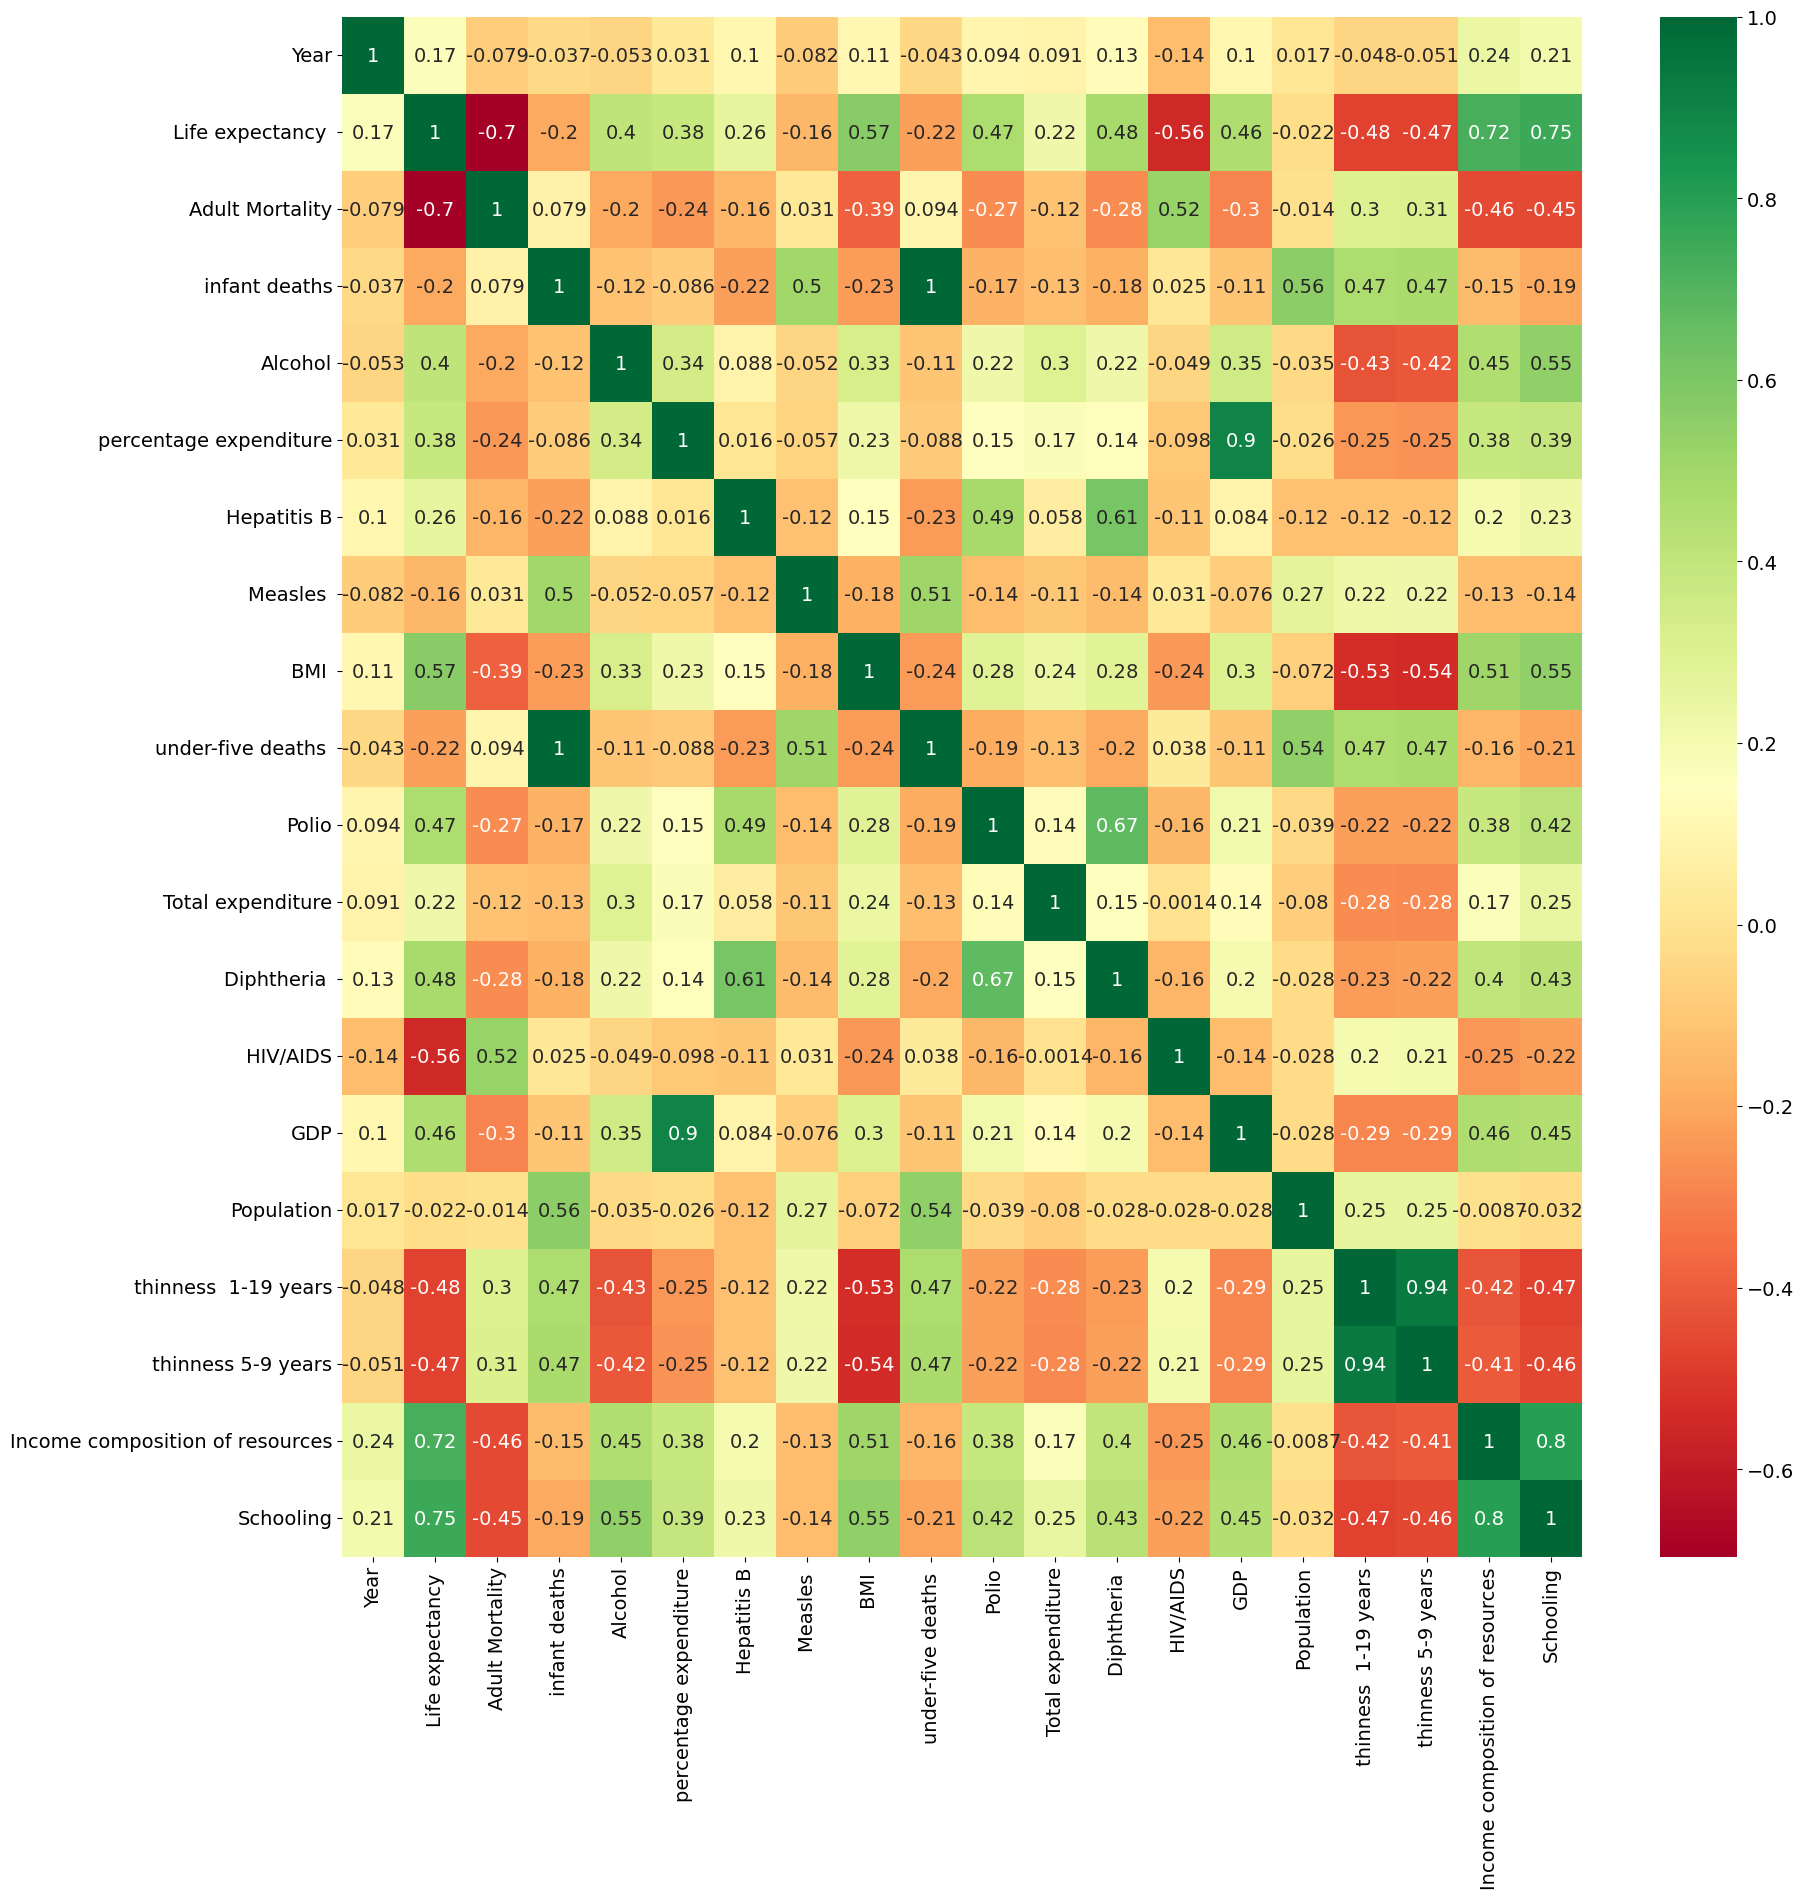

In [96]:
plt.figure(figsize=(20,20)) 
sns.heatmap(dataset.corr(),annot = True,cmap = "RdYlGn")
plt.show()

# Splitting the Dataset

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [147]:
dataset.dropna(axis=0, inplace=True)

In [148]:
dataset.shape

(1649, 22)

In [149]:
dataset_encoded = pd.get_dummies(dataset)

In [150]:
dataset_encoded.keys()

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ',
       ...
       'Country_Turkmenistan', 'Country_Uganda', 'Country_Ukraine',
       'Country_Uruguay', 'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Zambia', 'Country_Zimbabwe', 'Status_Developed',
       'Status_Developing'],
      dtype='object', length=155)

In [151]:
features = dataset_encoded.drop('Life expectancy ', axis=1)
targets = dataset_encoded['Life expectancy ']

In [152]:
features.head()

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0  2015            263.0             62     0.01               71.279624   
1  2014            271.0             64     0.01               73.523582   
2  2013            268.0             66     0.01               73.219243   
3  2012            272.0             69     0.01               78.184215   
4  2011            275.0             71     0.01                7.097109   

   Hepatitis B  Measles    BMI   under-five deaths   Polio  ...  \
0         65.0      1154   19.1                  83    6.0  ...   
1         62.0       492   18.6                  86   58.0  ...   
2         64.0       430   18.1                  89   62.0  ...   
3         67.0      2787   17.6                  93   67.0  ...   
4         68.0      3013   17.2                  97   68.0  ...   

   Country_Turkmenistan  Country_Uganda  Country_Ukraine  Country_Uruguay  \
0                     0               0                0                0   
1                     0               0                0                0   
2                     0               0                0                0   
3                     0               0                0                0   
4                     0               0                0                0   

   Country_Uzbekistan  Country_Vanuatu  Country_Zambia  Country_Zimbabwe  \
0                   0                0               0                 0   
1                   0                0               0                 0   
2                   0                0               0                 0   
3                   0                0               0                 0   
4                   0                0               0                 0   

   Status_Developed  Status_Developing  
0                 0                  1  
1                 0                  1  
2                 0                  1  
3                 0                  1  
4                 0                  1  

[5 rows x 154 columns]

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, shuffle=True)

# Decision Tree

In [155]:
from sklearn.linear_model import Ridge

In [156]:
ridge = Ridge()
ridge.fit(features_train, targets_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.18132e-20): result may not be accurate.



Ridge()

In [157]:
(ridge.score(features_train, targets_train), ridge.score(features_test, targets_test))

(0.9603450400288995, 0.9401117143485788)

In [158]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(features_train, targets_train)

(tree.score(features_train, targets_train), tree.score(features_test, targets_test))

(0.8992313682643619, 0.8655211091046435)

In [159]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [161]:
plt.figure(figsize=(10,10))
plot_tree(tree)

[Text(0.5, 0.9, 'x[17] <= 0.568\nsquared_error = 77.174\nsamples = 1236\nvalue = 69.202'),
 Text(0.25, 0.7, 'x[12] <= 1.55\nsquared_error = 44.686\nsamples = 392\nvalue = 59.732'),
 Text(0.125, 0.5, 'x[1] <= 245.5\nsquared_error = 19.888\nsamples = 208\nvalue = 63.98'),
 Text(0.0625, 0.3, 'x[12] <= 0.45\nsquared_error = 11.936\nsamples = 140\nvalue = 66.054'),
 Text(0.03125, 0.1, 'squared_error = 9.197\nsamples = 94\nvalue = 67.224'),
 Text(0.09375, 0.1, 'squared_error = 9.007\nsamples = 46\nvalue = 63.661'),
 Text(0.1875, 0.3, 'x[10] <= 10.22\nsquared_error = 9.176\nsamples = 68\nvalue = 59.71'),
 Text(0.15625, 0.1, 'squared_error = 6.066\nsamples = 66\nvalue = 60.026'),
 Text(0.21875, 0.1, 'squared_error = 0.16\nsamples = 2\nvalue = 49.3'),
 Text(0.375, 0.5, 'x[12] <= 16.25\nsquared_error = 29.267\nsamples = 184\nvalue = 54.93'),
 Text(0.3125, 0.3, 'x[1] <= 351.0\nsquared_error = 19.503\nsamples = 153\nvalue = 56.49'),
 Text(0.28125, 0.1, 'squared_error = 18.182\nsamples = 89\nvalue 

# Random Forest Regression Model

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
forest = RandomForestRegressor(n_estimators=100)
forest.fit(features_train, targets_train)

(forest.score(features_train, targets_train), forest.score(features_test, targets_test))

(0.9940725930284176, 0.9519467066811851)

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# create a Random Forest Regression model with 100 estimators
forest = RandomForestRegressor(n_estimators=100)

# fit the model to the training data
forest.fit(features_train, targets_train)

# make predictions on the training and test sets
train_preds = forest.predict(features_train)
test_preds = forest.predict(features_test)

# calculate the MAE, MSE, and RMSE for the training set
train_mae = mean_absolute_error(targets_train, train_preds)
train_mse = mean_squared_error(targets_train, train_preds)
train_rmse = np.sqrt(train_mse)

# calculate the MAE, MSE, and RMSE for the test set
test_mae = mean_absolute_error(targets_test, test_preds)
test_mse = mean_squared_error(targets_test, test_preds)
test_rmse = np.sqrt(test_mse)

print("Training set:")
print("MAE:", train_mae)
print("MSE:", train_mse)
print("RMSE:", train_rmse)

print("\nTest set:")
print("MAE:", test_mae)
print("MSE:", test_mse)
print("RMSE:", test_rmse)

Training set:
MAE: 0.40765291262136055
MSE: 0.4482752969255673
RMSE: 0.6695336413695485

Test set:
MAE: 1.1940048426150138
MSE: 3.721607825665861
RMSE: 1.9291469165581612
